In [243]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta
import yfinance as yf
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col
from tqdm import tqdm

In [235]:
def get_total_return(ticker, start_date, end_date):
    # Fetch the historical data for the specified stock and date range
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate the total return
    initial_price = stock_data['Open'].iloc[0]
    final_price = stock_data['Open'].iloc[-1]
    daily_returns = stock_data['Open'].pct_change()

    total_return = daily_returns.mean() * (len(daily_returns) - 1)*100

    # print("Total return from", start_date, "to", end_date, "for", ticker, ":", total_return, "%")
    return total_return

def get_price(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate the total return
    initial_price = stock_data['Open'].iloc[0]
    return initial_price

def get_price_spent(ticker, n, start_date):
    end_date = start_date + timedelta(days=1)
    stock_data = yf.download(ticker, start=start_date.date(), end=end_date.date())

    return (stock_data['Open']*n).values[0]

def get_sd(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date.date(), end=end_date.date())
    # Calculate the total return
    days = len(stock_data) - 1
    stddev_open = stock_data['Open'].pct_change().std()*(days**0.5)
    # stddev_open = stddev_open/stock_data['Open'][0]
    return stddev_open

def get_beta(ticker, start_date, end_date):
    x = yf.Ticker(ticker)
    if x.info.get('beta') == None:
        return x.info.get('beta3Year')
    return x.info.get('beta')

def get_ff3_regresssion(ticker, start_date, end_date):
        pass

def get_open_prices(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start=start_date, end=end_date)
    daily_returns = stock_data['Open'].pct_change()
    return daily_returns

In [262]:
initial_cash = 100000
tickers = ["SPY", "MCD", "NVDA", "EWH"]
counts = [90, 30, 20, 2000]
start_date = datetime.strptime("2024-01-31", "%Y-%m-%d")
end_date = datetime.strptime("2024-03-22", "%Y-%m-%d")
cost = []
total_return = []
std = []
beta = []
prices = []

for i in range(len(tickers)):
    total_return.append(get_total_return(tickers[i], start_date, end_date))
    cost.append(get_price_spent(tickers[i], counts[i], start_date))
    std.append(get_sd(tickers[i], start_date, end_date))
    beta.append(get_beta(tickers[i], start_date, end_date))
    prices.append(get_price(tickers[i], start_date, end_date))

total_cost = 0
for i in cost:
    total_cost += i
print(total_cost)

weights = []
for i in cost:
    weights.append(i/total_cost)


portfolio = pd.DataFrame({'Name': tickers, "Num of Stocks": counts, "Price": prices, "Initial Cost": cost, "Total Return": total_return, "Weight": weights, "Std Dev": std, "Beta": beta})
# pd.options.display.float_format = "{:,.2f}".format

# portfolio return
portfolio_return = 0
for i, row in portfolio.iterrows():
    portfolio_return += row["Total Return"] * row["Weight"]


print(portfolio)

print("Portfolio Return:", portfolio_return)

# portfolio standard deviation
df = yf.download(tickers, start=start_date, end=end_date).Open.pct_change()
df = df[["SPY", "MCD", "NVDA", "EWH"]]
df = df.iloc[1:]

cov = df.cov()
multiple = pd.DataFrame([[35,35,35,34],[35,35,35,34], [35,35,35,34], [34,34,34,34]], ["SPY", "MCD", "NVDA", "EWH"], ["SPY", "MCD", "NVDA", "EWH"])
# print(multiple)
cov = cov.mul(multiple)
print(cov)

weights = np.array(weights)
portfolio_risk = np.sqrt(np.dot(weights, np.dot(cov, weights.T)))
print("portfolio sd", portfolio_risk)

# portfolio beta
portfolio_beta = (weights*beta).sum()
print("portfolio beta:", portfolio_beta)

# risk free rate assume it is us 3 month t bill
rf_df = yf.download("^IRX", start=start_date, end=end_date)
rf_df = rf_df["Open"]
# print("rf:", rf_df.mean()['Open'])
rf_df.name = "rf"
# convert rf to daily values
rf_df = (1 + rf_df)**(1/360)-1


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

96500.80047607422
   Name  Num of Stocks       Price  Initial Cost  Total Return    Weight  \
0   SPY             90  488.619995  43975.799561      6.968143  0.455704   
1   MCD             30  295.899994   8876.999817     -3.687008  0.091989   
2  NVDA             20  614.400024  12288.000488     43.448739  0.127336   
3   EWH           2000   15.680000  31360.000610      3.143101  0.324971   

    Std Dev   Beta  
0  0.042384  1.000  
1  0.069973  0.718  
2  0.227846  1.725  
3  0.062348  0.920  
Portfolio Return: 9.390242032297742
Ticker       SPY       MCD      NVDA       EWH
Ticker                                        
SPY     0.001796  0.000219  0.007583  0.000503
MCD     0.000219  0.004896 -0.002041  0.000138
NVDA    0.007583 -0.002041  0.051914  0.001577
EWH     0.000503  0.000138  0.001577  0.003776
portfolio sd 0.05285119915008359
portfolio beta: 1.0403798345463222


In [236]:
# SMB
small = ["IWN", "XSLV", "IWO"]
big =  ["DIA", "RSP", "QQQ"]
start_date = datetime.strptime("2024-01-31", "%Y-%m-%d")
end_date = datetime.strptime("2024-03-22", "%Y-%m-%d")


# average returns for small
s = yf.download(small, start=start_date, end=end_date)
days = len(s)
sm = s.Open.pct_change()
sm["mean"] = sm.mean(axis=1)
# print(sm)

# average returns for big
b = yf.download(big,  start=start_date, end=end_date)
bm = b.Open.pct_change()
bm["mean"] = bm.mean(axis=1)
# print(bm)

smb = (sm-bm)["mean"].dropna()
smb.name = "smb"
# print("SMB", smb)

# print("sum:", smb.sum())

# HML
value = ["SPYV", "FVAL"]
growth = ["QQQ", "VUG"]
start_date = datetime.strptime("2024-01-31", "%Y-%m-%d")
end_date = datetime.strptime("2024-03-22", "%Y-%m-%d")


# average returns for small
v = yf.download(value, start=start_date, end=end_date)
days = len(v)
vm = v.Open.pct_change()
vm["mean"] = vm.mean(axis=1)

# average returns for big
g = yf.download(growth,  start=start_date, end=end_date)
gm = g.Open.pct_change()
gm["mean"] = gm.mean(axis=1)

hml = (vm - gm)["mean"].dropna()
hml.name = "hml"
# print("HML", hml)
# print("sum:", hml.sum())


[*********************100%%**********************]  3 of 3 completed


[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


In [276]:
# merge all the tickers daily open price with the smb and hml
to_calc = get_open_prices(tickers, start_date, end_date).merge(rf_df, on="Date")
to_calc = to_calc.merge(smb, on="Date")
to_calc = to_calc.merge(hml, on="Date")
to_calc["Rm"] = to_calc["SPY"] - to_calc["rf"]
print(to_calc)

# Regressions to compute FF5 alphas and corresponding t-stats.
a1, a3, a5, am = [],[],[],[]
rsquared1, rsquared3, rsquared5, rsquaredm = [],[],[],[]
lower1, lower3, lower5, lowerm = [],[],[],[]
upper1, upper3, upper5, upperm = [],[],[],[]
s = []
models = {}
for i in portfolio["Name"]:
    if len(df[i].dropna()) !=0:
        Rm = to_calc["Rm"]
        s.append(i)

        # reg = sm.ols("%s ~ Rm" %i, data=to_calc).fit()
        ff3 = sm.ols("%s ~ Rm + smb + hml" %i, data=to_calc).fit()
        models[i] = ff3
        # ff5 = sm.ols("%se ~ Mkt_RF + SMB + HML + rmw + cma" %i, data=df).fit()
        # mom = sm.ols("%se ~ Mkt_RF + SMB + HML + rmw + cma + Momentum" %i, data=df).fit()

        # a1.append(reg.params[0])
        # lower1.append(reg.conf_int().T["Intercept"][0])
        # upper1.append(reg.conf_int().T["Intercept"][1])

        a3.append(ff3.params[0])
        lower3.append(ff3.conf_int().T["Intercept"][0])
        upper3.append(ff3.conf_int().T["Intercept"][1])

        # a5.append(ff5.params[0])
        # lower5.append(ff5.conf_int().T["Intercept"][0])
        # upper5.append(ff5.conf_int().T["Intercept"][1])

        # am.append(mom.params[0])
        # lowerm.append(mom.conf_int().T["Intercept"][0])
        # upperm.append(mom.conf_int().T["Intercept"][1])

        rsquared1.append(reg.rsquared_adj)
        rsquared3.append(ff3.rsquared_adj)
        # rsquared5.append(ff5.rsquared_adj)
        # rsquaredm.append(mom.rsquared_adj)
    else:
        pass

# result = pd.DataFrame()
# result["stock"] = s
# result["a_capm"] = a1
# result["lower_capm"] = lower1
# result["upper_capm"] = upper1
# result["r2_capm"] = rsquared1

# result["a_ff3"] = a3
# result["lower_ff3"] = lower3
# result["upper_ff3"] = upper3
# result["r2_ff3"] = rsquared3

# result["a_ff5"] = a5
# result["lower_ff5"] = lower5
# result["upper_ff5"] = upper5
# result["r2_ff5"] = rsquared5

# result["a_mom"] = am
# result["lower_mom"] = lowerm
# result["upper_mom"] = upperm
# result["r2_mom"] = rsquaredm

[**********************75%%**********            ]  3 of 4 completed

[*********************100%%**********************]  4 of 4 completed

                 EWH       MCD      NVDA       SPY        rf       smb  \
Date                                                                     
2024-02-01  0.007015 -0.014194  0.010742 -0.008166  0.005079 -0.005855   
2024-02-02 -0.012666  0.014981  0.030177  0.010358  0.005081 -0.011449   
2024-02-05  0.004490 -0.030601  0.066449  0.008271  0.005085 -0.009626   
2024-02-06  0.022989 -0.014076  0.020594 -0.000365  0.005092 -0.004309   
2024-02-07  0.006242  0.007351 -0.018828  0.005613  0.005090  0.005129   
2024-02-08 -0.005583  0.004034  0.025688  0.003647  0.005088 -0.007440   
2024-02-09 -0.004367  0.020790  0.006550  0.001486  0.005089  0.015589   
2024-02-12  0.010652 -0.010782  0.029305  0.004671  0.005088  0.010410   
2024-02-13 -0.006820 -0.001280 -0.030303 -0.013249  0.005092 -0.005613   
2024-02-14  0.003745 -0.004539  0.039801  0.004570  0.005095  0.003184   
2024-02-15  0.001866  0.002019  0.009112  0.005032  0.005088  0.007364   
2024-02-16  0.014277  0.010038  0.0031


/var/folders/zk/99phrd0d2fs5xjbc622wn4_h0000gn/T/ipykernel_17370/609724633.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a3.append(ff3.params[0])
/var/folders/zk/99phrd0d2fs5xjbc622wn4_h0000gn/T/ipykernel_17370/609724633.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a3.append(ff3.params[0])
/var/folders/zk/99phrd0d2fs5xjbc622wn4_h0000gn/T/ipykernel_17370/609724633.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a

In [279]:
for i in models.keys():
    print(i)
    print(models[i].summary())

SPY
                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.893e+07
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.82e-97
Time:                        22:31:58   Log-Likelihood:                 376.07
No. Observations:                  35   AIC:                            -744.1
Df Residuals:                      31   BIC:                            -737.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051   1.17e-06   4355.600     

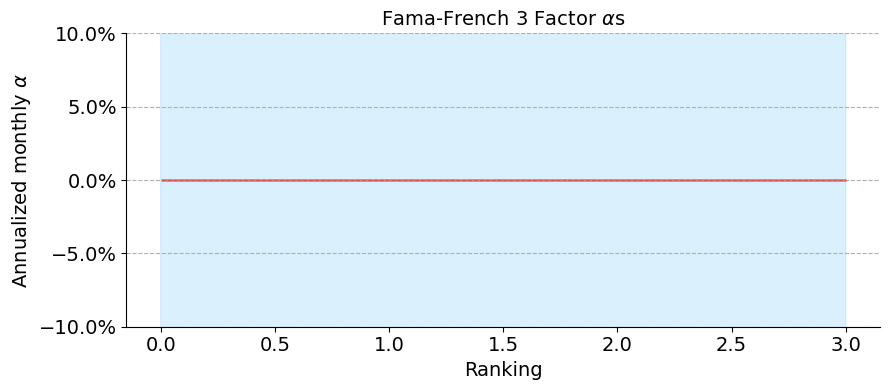

In [265]:
# FF3 alphas plots with confidence intervals
t = result[["stock","a_ff3","lower_ff3","upper_ff3"]]
t = t.sort_values(by=["a_ff3"]).reset_index().drop(columns=["index"])

fig, ax = plt.subplots(figsize=(9,4))

ax.plot(t.index, t.a_ff3*12*100, color="navy", marker="s", ls="")
ax.fill_between(t.index, t.lower_ff3*12*100, t.upper_ff3*12*100, color="lightskyblue", alpha=0.3)
ax.hlines(0,0,len(t)-1, color="red", lw=2, alpha=0.5)

ax.tick_params(axis = "both", labelsize = 14)
ax.set_xlabel("Ranking",fontsize=14)
ax.set_ylabel("Annualized monthly $\\alpha$",fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.grid(axis="y",linestyle="--")
ax.set_title("Fama-French 3 Factor $\\alpha$s", fontsize=14)
plt.ylim([-10,10])
sns.despine()
plt.tight_layout()

Alpha = R(i) - (R(f) + B x (R(m) - R(f)))

In [154]:
# jensen's alpha

# print(portfolio[portfolio["Name"]== "SPY"]["Total Return"])
alpha = portfolio_return - (rf + portfolio_beta*((portfolio[portfolio["Name"]== "SPY"])["Total Return"].values[0] - rf))
print("jensen's alpha:", alpha)

jensen's alpha: 2.351750642880339


In [155]:
#systematic risk
systematic_risk = ((portfolio_beta**2) * (0.042384**2))**0.5
print("systematic risk:", systematic_risk)

systematic risk: 0.04409545890741132


In [157]:
#treynor ratio
treynor = (portfolio_return- rf)/portfolio_beta
print("treynor:", treynor)

treynor: 4.00264376377067


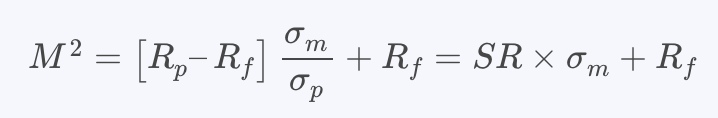

In [168]:
# m**2
w = portfolio[portfolio["Name"]== "SPY"]["Std Dev"].values[0]/portfolio_risk



m_square = w*portfolio_return + (1-w)*rf - portfolio[portfolio["Name"]== "SPY"]["Total Return"].values[0]
print("m^2:", m_square)

m^2: 1.5973506298133469
